ODI Matches Matplotlib

## Project Info

**Name:** Summary of Win %ages of ODI Cricket Teams

**Region:** World Teams - India, Australia, South Africa & England

**Category:** Sports

**Question:** How are win %ages of cricket teams in world.

**Links:** 

[India](http://www.howstat.com/cricket/Statistics/Matches/MatchListCountry_ODI.asp?A=IND)

[Australia](http://www.howstat.com/cricket/Statistics/Matches/MatchListCountry_ODI.asp?A=AUS)

[England](http://www.howstat.com/cricket/Statistics/Matches/MatchListCountry_ODI.asp?A=ENG)

[South Africa](http://www.howstat.com/cricket/statistics/Matches/MatchListCountry_ODI.asp?A=SAF)

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.colors as col
import matplotlib.cm as cm
import seaborn as sns
import re

%matplotlib notebook

plt.style.use('seaborn-colorblind')


In [176]:
df=pd.read_excel('ODI_List.xlsx',"Sheet2")
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df = df.rename(columns = {'Sum of Win': 'Win', 'Sum of Loss': 'Loss','Sum of Total': 'Total'}, inplace = False)
df['Win']=df['Win'].fillna(0)
df['Loss']=df['Loss'].fillna(0)

In [177]:
df_ind=df[df['Team']=='IND']
df_ind.head()

,Team,Year,Win,Loss,Total
100,IND,1974,0,2,2
101,IND,1975,1,2,3
102,IND,1976,0,2,2
103,IND,1978,1,2,3
104,IND,1979,0,3,3


In [178]:
yr_x=[1971,
1972,
1973,
1974,
1975,
1976,
1977,
1978,
1979,
1980,
1981,
1982,
1983,
1984,
1985,
1986,
1987,
1988,
1989,
1990,
1991,
1992,
1993,
1994,
1995,
1996,
1997,
1998,
1999,
2000,
2001,
2002,
2003,
2004,
2005,
2006,
2007,
2008,
2009,
2010,
2011,
2012,
2013,
2014,
2015,
2016,
2017,
2018,
2019,
2020,
2021]

In [179]:
yrdf=pd.DataFrame(yr_x)
yrdf = yrdf.rename(columns = {0: 'Year'}, inplace = False)
yrdf.head()

,Year
0,1971
1,1972
2,1973
3,1974
4,1975


In [180]:
df_ind['WinPercent_ind']=df_ind['Win']/df_ind['Total']
df_ind.head()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Team,Year,Win,Loss,Total,WinPercent_ind
100,IND,1974,0,2,2,0
101,IND,1975,1,2,3,0.333333
102,IND,1976,0,2,2,0
103,IND,1978,1,2,3,0.333333
104,IND,1979,0,3,3,0


In [181]:
df_ind=pd.merge(yrdf,df_ind,how='left',on=['Year'])
df_ind.head()

,Year,Team,Win,Loss,Total,WinPercent_ind
0,1971,NaN,NaN,NaN,NaN,NaN
1,1972,NaN,NaN,NaN,NaN,NaN
2,1973,NaN,NaN,NaN,NaN,NaN
3,1974,IND,0.0,2.0,2,0
4,1975,IND,1.0,2.0,3,0.333333


In [182]:
df_eng=df[df['Team']=='ENG']
df_aus=df[df['Team']=='AUS']
df_saf=df[df['Team']=='SAF']
df_eng['WinPercent_eng']=df_eng['Win']/df_eng['Total']
df_aus['WinPercent_aus']=df_aus['Win']/df_aus['Total']
df_saf['WinPercent_saf']=df_saf['Win']/df_saf['Total']

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

In [183]:
Teams=pd.merge(df_ind.drop(['Win','Loss','Total'],axis=1),df_eng.drop(['Win','Loss','Total'],axis=1),how='left',on=['Year'])
Teams.head()

,Year,Team_x,WinPercent_ind,Team_y,WinPercent_eng
0,1971,NaN,NaN,ENG,0
1,1972,NaN,NaN,ENG,0.666667
2,1973,NaN,NaN,ENG,0.5
3,1974,IND,0,ENG,0.5
4,1975,IND,0.333333,ENG,0.571429


In [184]:
Teams=pd.merge(Teams,df_aus.drop(['Win','Loss','Total'],axis=1),how='left',on='Year')
Teams=pd.merge(Teams,df_saf.drop(['Win','Loss','Total'],axis=1),how='left',on='Year')

In [185]:
Teams.head()

,Year,Team_x,WinPercent_ind,Team_y,WinPercent_eng,Team_x,WinPercent_aus,Team_y,WinPercent_saf
0,1971,NaN,NaN,ENG,0,AUS,1,NaN,NaN
1,1972,NaN,NaN,ENG,0.666667,AUS,0.333333,NaN,NaN
2,1973,NaN,NaN,ENG,0.5,NaN,NaN,NaN,NaN
3,1974,IND,0,ENG,0.5,AUS,1,NaN,NaN
4,1975,IND,0.333333,ENG,0.571429,AUS,0.571429,NaN,NaN


<IPython.core.display.Javascript object>


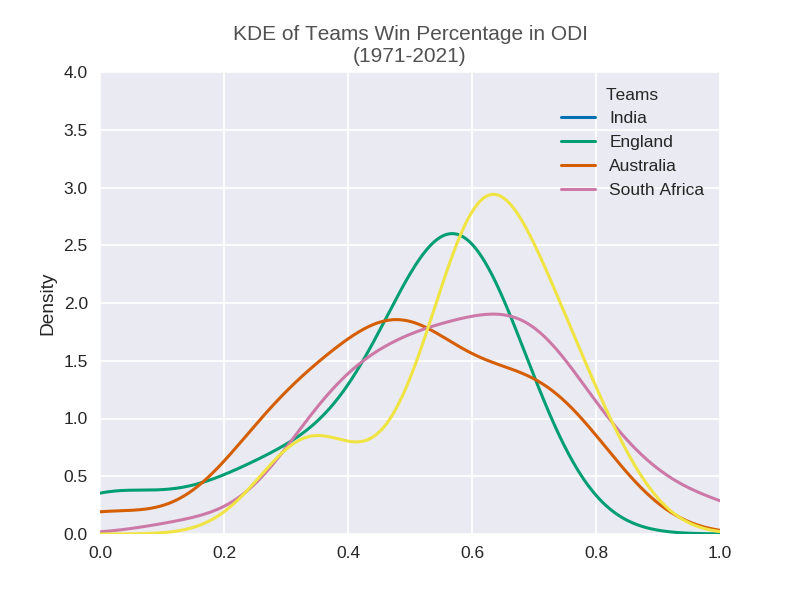

In [186]:
%matplotlib notebook
# Draw KDE
kde=Teams.plot.kde()
[kde.spines[loc].set_visible(False) for loc in ['top', 'right']]
kde.axis([0,1,0,4])
kde.set_title('KDE of Teams Win Percentage in ODI\n(1971-2021)',alpha=0.8)
kde.legend(['India','England','Australia','South Africa'],loc = 'best',frameon=False, title='Teams', fontsize=10)

<IPython.core.display.Javascript object>


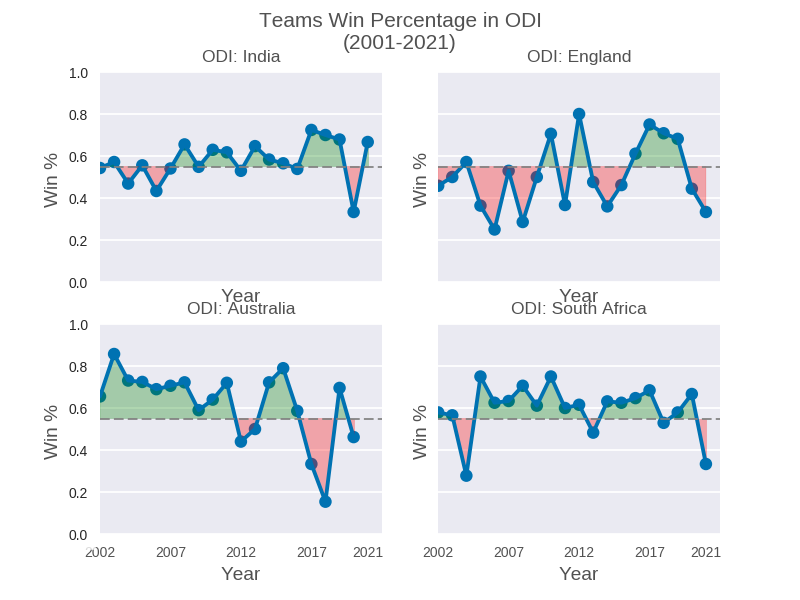

In [198]:
Teams=Teams[Teams['Year']>2001]
Teams["WinPercent_ind"] = Teams.WinPercent_ind.astype(float)
Teams["WinPercent_eng"] = Teams.WinPercent_eng.astype(float)
Teams["WinPercent_aus"] = Teams.WinPercent_aus.astype(float)
Teams["WinPercent_saf"] = Teams.WinPercent_saf.astype(float)
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
axs=[ax1,ax2,ax3,ax4]

fig.suptitle('Teams Win Percentage in ODI\n(2001-2021)',alpha=0.8);

# Properties
columns_w=['WinPercent_ind','WinPercent_eng','WinPercent_aus','WinPercent_saf']
colors=['g','b','y','r']
titles=['ODI: India','ODI: England','ODI: Australia','ODI: South Africa']
axis=[0,20,0,1]

y=0.55



In [199]:
for i in range(len(axs)):
    
    # Draw the subplot
    ax=axs[i]
    sns.pointplot(x=Teams['Year'],y=Teams[columns_w[i]],scale = 0.7, alpha=0.5,ax=ax)
    ax.axhline(y=0.55, color='gray', linewidth=1, linestyle='--')
    ax.fill_between(range(0,20), 0.55, Teams[columns_w[i]],where=(Teams[columns_w[i]]<y), color='red',interpolate=True, alpha=0.3)
    ax.fill_between(range(0,20), 0.55, Teams[columns_w[i]],where=(Teams[columns_w[i]]>y), color='green',interpolate=True, alpha=0.3)

    # Beautify the plot
    [ax.spines[loc].set_visible(False) for loc in ['top', 'right']] # Turn off some plot rectangle spines
    ax.set_ylabel('Win % ', alpha=0.8)
    ax.set_xlabel('Year', alpha=0.8)
    ax.set_title(titles[i], fontsize=10, alpha=0.8)
    ax.axis(axis)
    ax.set_xticks(np.append(np.arange(0, 20, 5),19)) 
    ax.set_xticklabels(['2002','2007','2012','2017','2021'], fontsize=8, alpha=0.8)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(8)
        label.set_bbox(dict(facecolor='white',edgecolor='white',  alpha=0.8))
